# Test

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from module.dun_datasets.image_loaders import get_image_loader
import torch
def show(image):
#     image = Image.open(RESULT_IMAGE_PATH)
    plt.figure(figsize= (12,12))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [2]:
dataset = 'MNIST'
workers = 8
batch_size =256
data_dir = 'data'
_, train_loader, _, _, _, Ntrain = get_image_loader(dataset, batch_size=batch_size, cuda=True, workers=workers, data_dir=data_dir, distributed=False)


Ntrain: 60000, Nval: 10000


/home/me/.local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


label_y :  tensor(4)


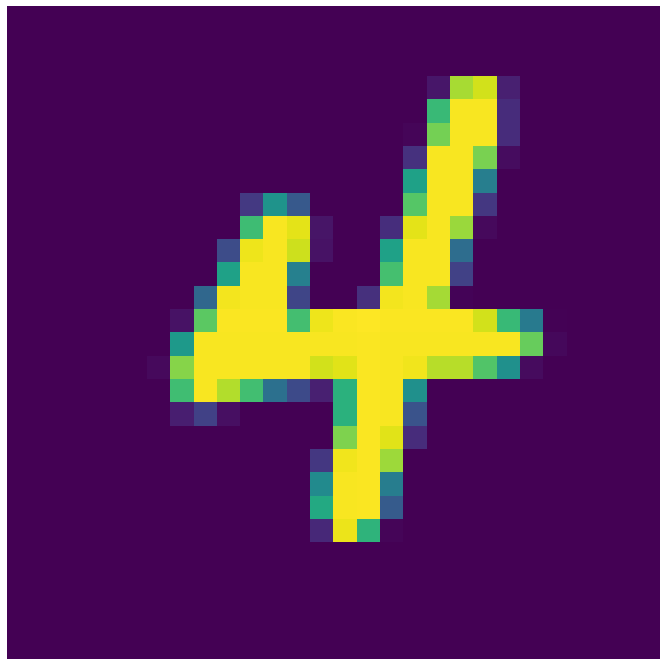

one_hot :  tensor([0, 0, 0, 0, 1])
torch.Size([256, 1000])
tensor([[ 0.4280, -1.1470, -0.2544,  ...,  0.8233,  1.1035, -0.1385],
        [-0.7563, -0.6245, -0.7284,  ..., -0.7054,  0.5384, -0.3336],
        [ 0.1410, -1.5692, -0.5552,  ..., -0.5515,  1.7640,  0.1387],
        ...,
        [-1.1981, -1.5929, -0.5485,  ...,  0.0750,  0.7921,  0.2469],
        [ 0.3941, -0.1387, -0.6336,  ...,  0.1789,  0.4458, -0.7246],
        [-0.7106, -1.3108, -0.5950,  ..., -0.5843,  0.9250, -0.2318]],
       grad_fn=<AddmmBackward>)


In [22]:
for i in train_loader:
    image_x = i[0]
    label_y = i[1]
    index = 2
#     print("image_x : ", image_x, image_x.size())
#     print("label_y : ", label_y, label_y.size())
    print("label_y : ", label_y[index])
    show(image_x[index].reshape(28, 28))
    target = label_y[index]
    one_hot = torch.nn.functional.one_hot(target)
    print("one_hot : ", one_hot)

    out = model(image_x)
    print(out.size())
    print(out)
    break

In [2]:
from module.resnet import MyResNet


In [3]:
model = MyResNet()

In [4]:
model

MyResNet(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

## define Path

In [9]:
modelName = "jupyterTest"
MODEL_PATH = "./result/" + modelName + "/flow_last.pt"
RESULT_IMAGE_PATH = "./result/"+ modelName +"/var.png"

## train flow

In [11]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
!python3 train_image_flow.py --config ./config/config_mnist.yaml --output_folder $modelName --gpu 8

add_uniform: false
batch: 256
cond_size: 512
condition_scale: 1
dataset: MNIST
epochs: 40
eval_data:
    count: 300
flow_modules: 32-32-32-32-32
image_task: true
inputDim: 10
linear_encode: false
linear_encode_m: 50
lr: 0.01
lr_scheduler: cos
output_folder: jupyterTest
position_encode: false
position_encode_m: 50
remark: ''
sample_count: 256
start_time: _04-26_14:51
time_seed: 0
uniform_rate: 0.1
uniform_scheduler: false
var_scale: 3
workers: 32

wandb: Currently logged in as: andy-su (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.15 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.12.11
wandb: Run data is saved locally in /mnt/train-data-5-hdd/andysu/DATA/project/UncertaintyFlow/wandb/run-20220426_065149-2kb5vx93
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run jupyterTest
wandb: ⭐️ View project at https://wandb.ai/andy-su/UncertaintyFlow
wandb: 🚀 View run at https://wandb.

## eval

In [9]:
!python3 test_flow.py --modelPath $MODEL_PATH

add_uniform: false
batch: 100
cond_size: 1
condition_scale: 1
dataset: MNIST
epochs: 100
eval_data:
    count: 300
flow_modules: 32-32-32-32-32
image_task: true
inputDim: 10
linear_encode: false
linear_encode_m: 50
lr: 0.001
lr_scheduler: ''
output_folder: jupyterTest
position_encode: false
position_encode_m: 50
remark: ''
sample_count: 100
start_time: _04-24_12:35
time_seed: 0
uniform_rate: 0.1
uniform_scheduler: false
var_scale: 3
workers: 8

/home/me/.local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.f

# visualize

> wiggle m = 2 

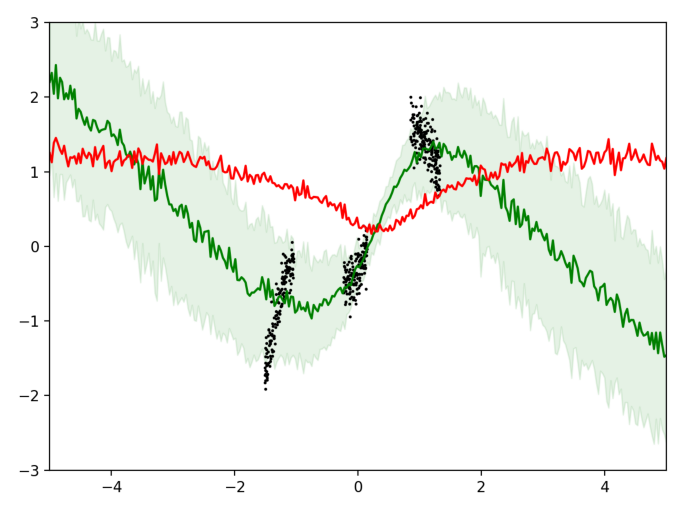

In [114]:
show()

> wiggle m = 30

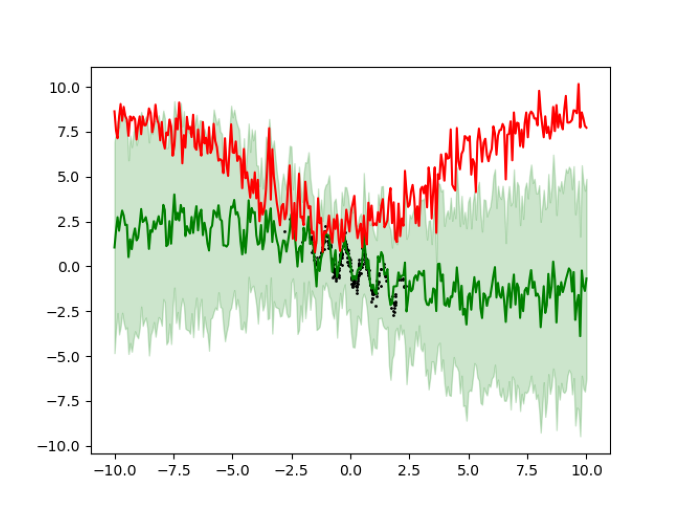

In [10]:
show()

> wiggle m = 100

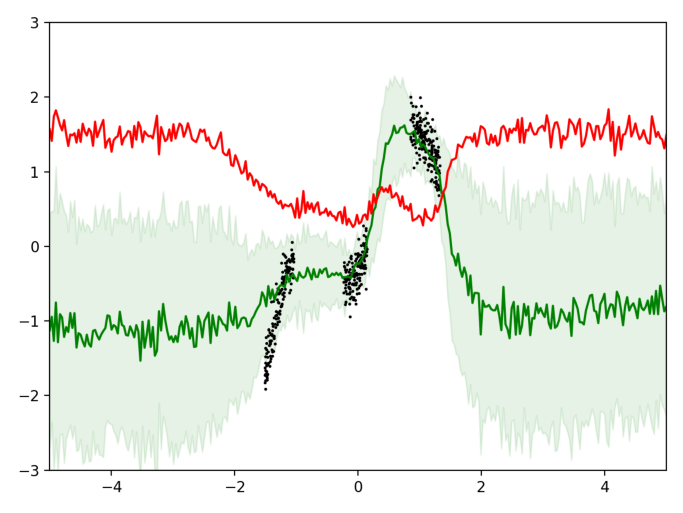

In [48]:
show()

### my_1d m = 2

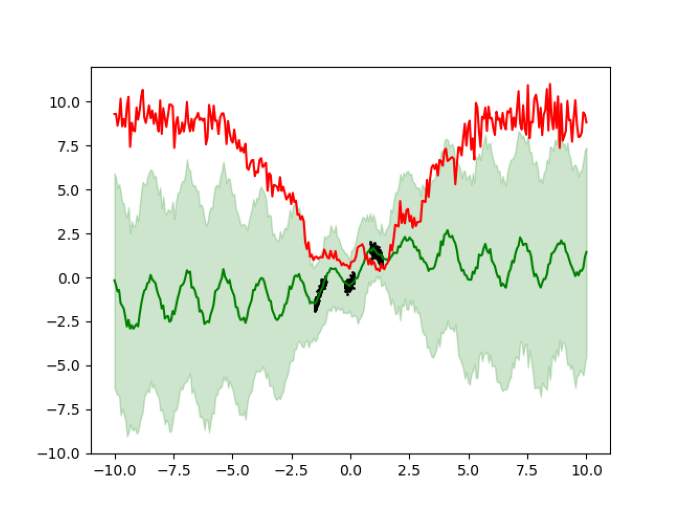

In [91]:
show()

### my_1d m = 30

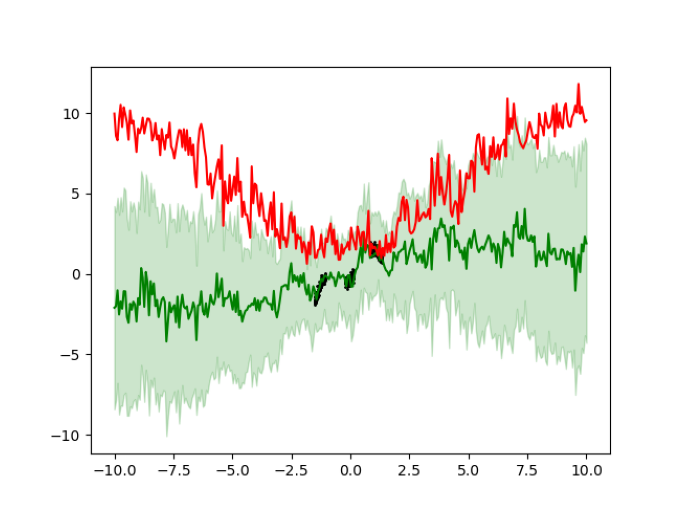

In [5]:
show()